### Student Information
Name: 嚴翎愷

Student ID: 110062643

GitHub ID: kylekylehaha

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# First Part

In [27]:
import nltk
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

## Data Preparation

In [6]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [7]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

---

## Exercise 1 (5 min)

In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [8]:
# Answer here
for i in range (3):
    print("\n".join(twenty_train.data[i].split("\n")))
    print("=========================================================")

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

---

## Exercise 2 (Take Home)

Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [12]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [13]:
#Answer here
# Choose text and category_name column
X.loc[::10, ['text', 'category_name']][:10]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,alt.atheism


---

## Exercise 3 (5 min):
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [14]:
# Answer here
filt = X[X['category_name']=='comp.graphics']
filt[::10][:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


## Exercise 4 (5 min):
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [15]:
# Answer here
null_data = X[X.isnull().any(axis=1)]
null_data

,text,category,category_name


---

## Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [16]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [17]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer here**

We can observe that  id 'C', 'D', 'F' missing_example are 'NaN, 'None', ''. Because their type are **str**, it means there is not `None`.

Therefore, we can see that after `is.null()`, index $2$, $3$ and $5$ are not null.

---

## <font color='red'>Exercise 6 (take home)</font>:
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

## Exercise 7 (5 min):
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [19]:
X_sample = X.sample(n=1000) #random state

In [21]:
print(type(X_sample.category_name.value_counts()))

<class 'pandas.core.series.Series'>


- [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Series.plot.html)

<AxesSubplot:title={'center':'Category distribution'}>

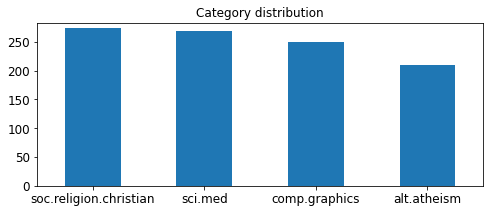

In [20]:
upper_bound = max(X_sample.category_name.value_counts()) + 10
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3)) #rot: 旋轉 x label 的方向

---

## Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![](https://i.imgur.com/9eO431H.png)

[matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

`plt.bar(x, height, width)`
- `x`: x 軸上座標
- `height`: 每個 bar 的高度

利用 `align` 和 `width` attribute 來讓 bar 並排。
- `align`: 標示直條圖在 x label 上是否為 center or edge


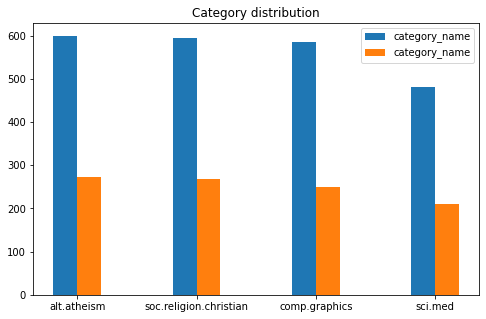

In [23]:
# Anser here
plt.figure(figsize=(8,5))
plt.title("Category distribution")
plt.bar(categories, X.category_name.value_counts(), align='edge', width=-0.2, label="category_name")
plt.bar(categories, X_sample.category_name.value_counts(), align='edge', width=0.2, label="category_name")
plt.legend(loc='upper right')
plt.show()

---

## Exercise 9 (5 min):
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [25]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

透過 `count_vect.fit_transform` 可以將一連串的 document (`X.text`) 轉成 `X_counts`。

接著透過 `toarray()` 可以將 `X_counts` 轉成**詞頻矩陣(term-document matrix)**：
- a[i][j] 代表詞 j 在 document i 中出現的次數。

In [28]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) # X_counts type: ndarray

![](https://i.imgur.com/LKUwaxl.png)

In [29]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [ ]:
# Answer here
analyze(" ".join(list((X[0:1]['text']))))

---

## Exercise 10 (take home):
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

可以發現 `1` 出現在 document 5 中的第 $0$ 項 和第 $37$ 項，因此再利用 `feature_name` 得知其 term 為何。

In [51]:
X_fifth_document = X_counts[4, 0:50].toarray()
# print(type(X_fifth_document)) # X_fifth_document type is ndarray

# Find index that occur 1 in term-document matrix
index = np.argwhere(X_fifth_document == 1)

# print(index)
# [ 0  0]
#  [ 0 37]]


#Get feature name by index
term_name = count_vect.get_feature_names_out()
print(term_name[index[1][1]])


01


---

## Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization